In [1]:
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [2]:
align = AlignIO.read('msa.phy', 'phylip')
print(align)

Alignment with 6 rows and 3331 columns
CATGCTACTCCACACACCAAGCTATCTAGCCTCCCCAATCCAAA...ATA homo_sapie
CATACTACTCCACACACCAAACTACCTAGCCTCCCCAATCCAAA...ATA chimpanzee
CATGCTACTCCACACACCAAGCTACCTAGTCTCCCCAATCCAAA...ACA bonobo
CATACTACTCCACACACCAAATCATCTAGCCTCCCCAGTCCAGA...ACA gorilla
CATACCACTCCACACCCTATACCATCCAACTTCCCCTATCCGAA...ACA orangutan
CATATCACTCCAAACCCCAAACCATCCAGCCTCCCCAATTCAAA...ACA sumatran


In [3]:
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

homo_sapie  0.000000
chimpanzee  0.226959    0.000000
bonobo  0.220955    0.096968    0.000000
gorilla 0.266887    0.257881    0.249775    0.000000
orangutan   0.317322    0.321825    0.316121    0.322426    0.000000
sumatran    0.314020    0.328130    0.324227    0.328430    0.153107    0.000000
    homo_sapie  chimpanzee  bonobo  gorilla orangutan   sumatran


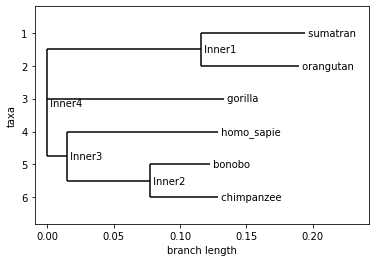

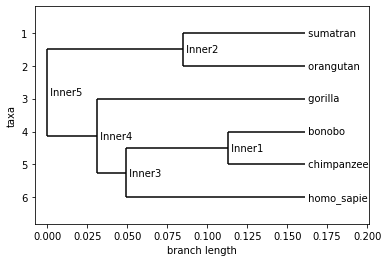

In [6]:
construct = DistanceTreeConstructor()

tree = construct.nj(distMatrix)

tree2 = construct.upgma(distMatrix)
Phylo.draw(tree)
Phylo.draw(tree2)

In [6]:
import numpy as np
def hamming_distance(seq1, seq2):
    n = len(seq1)
    distance = 0

    for i in range(n):
        if seq1[i] != seq2[i]:
            distance += 1

    return distance

def construct_distance_matrix(sequences):
    n = len(sequences)
    distance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1, n):
            seq1 = sequences[i]
            seq2 = sequences[j]

            # Calculate the Hamming distance between the two sequences
            distance_matrix[i, j] = hamming_distance(seq1, seq2)
            distance_matrix[j, i] = distance_matrix[i, j]

    return distance_matrix

seq = ["-AT---TACA", "AATACATTCA"]

matrix = construct_distance_matrix(seq)

print(matrix)

[[0. 5.]
 [5. 0.]]


In [8]:
construct = DistanceTreeConstructor()
tree = construct.nj(matrix)

Phylo.draw_ascii(tree)

TypeError: Must provide a DistanceMatrix object.